# An ML project to Predict Customer Churn

#### We will be working on an ML classification project that will help a a large telecommunications company predict customer churn.
#### We will be using the CRISP-DM framework for the purposes of this project

### Business Understanding
The main aim for every business is to make profit. This can be done by getting new customers and or by retaining the current customer base. Getting new customers is difficult and mostly expensive.  A company's best best is to retain it's current customer base, satisfied existing customers can also market a company through word of mouth. 

In this project, our aim is to help a large telecommunications company to be able to predict if a customer will stay or leave their customer base. This will help the company identify customers who are likely to leave and if possible device strategies to change their minds into staying to enjoy the company's products. 



Null hypothesis :
    1. There is a dominant attribute that affects churn
    2. The customer is not likely to churn
 
Alternative hypothesis:
    1. There is no dominant attribute that affects churn
    2. The customer is  likely to churn
 
### Analytical questions
 
    1.What is the total churn rate?
    2.How does tenure affect the churn?
    3.How does the type of internet service affect churn?
    4.How does the type of contract affect the churn?
    5.How does the type of payment method affect the churn?

### Loading datasets

Loading all necessary libraries

In [194]:
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import dotenv_values



In [195]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [196]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")

In [197]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [198]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

## Loading 1st training data

In [199]:
# Sql query to retrieve data from the table LP2_Telco_churn_first_3000 from Microsoft SQL database
table_1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
#Execute the SQL queries and load the results into Pandas DataFrames
table_1 = pd.read_sql(table_1, connection)
#Show retrieved table
table_1.head()


C:\Users\user\AppData\Local\Temp\ipykernel_21332\1477551745.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_1 = pd.read_sql(table_1, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## Loading 2nd training data

In [200]:
table_2 = pd.read_csv("Data\LP2_Telco-churn-second-2000.csv")
table_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Loading test data

In [201]:
test = pd.read_excel("Data\Telco-churn-last-2000.xlsx")
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


# Data cleaning and exploration

In [202]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [203]:
table_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [204]:
table_1['MultipleLines'] == None

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: MultipleLines, Length: 3000, dtype: bool

In [205]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [206]:
table_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [208]:
train = pd.concat([table_1, table_2])
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


## Data Cleaning

In [209]:
# Drop the unnecessary columns

train.drop('customerID', axis=1, inplace=True)

In [210]:
# Function to replace all True and False with Yes and No

def replace_true_and_false_with_yes_and_no(table):
    for column in table.columns:
        table[column] = table[column].replace({False: 'No', True: 'Yes'}, regex=True)
    return table

clean_train = replace_true_and_false_with_yes_and_no(train)

In [211]:
# Function to replace all no internet service with No

def replace_no_internet_service_with_no(table):
    for column in table.columns:
        table[column] = table[column].replace('No internet service', 'No', regex = True)
    return table

clean_train = replace_no_internet_service_with_no(clean_train) 

In [212]:
# Function to replace all No phone service with No

def replace_no_internet_service_with_no(table):
    for column in table.columns:
        table[column] = table[column].replace('No phone service', 'No')
    return table

clean_train = replace_no_internet_service_with_no(clean_train)

In [213]:
clean_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [214]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [215]:
#Clean Churn Column to allow for stratify in Splitting to X and y train
clean_train['Churn'].fillna(clean_train['Churn'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_21332\305793970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_train['Churn'].fillna(clean_train['Churn'].mode()[0], inplace=True)


In [216]:
# Fill missing value and Convert Total Charges column to float
#
clean_train['TotalCharges'] = pd.to_numeric(clean_train['TotalCharges'], errors='coerce')
clean_train['TotalCharges'].fillna(clean_train['MonthlyCharges'], inplace=True)
clean_train['TotalCharges'] = clean_train['TotalCharges'].astype(float) 

C:\Users\user\AppData\Local\Temp\ipykernel_21332\3035656884.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_train['TotalCharges'].fillna(clean_train['MonthlyCharges'], inplace=True)


In [217]:
clean_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
2039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
2040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
2041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


## Univariate Analysis

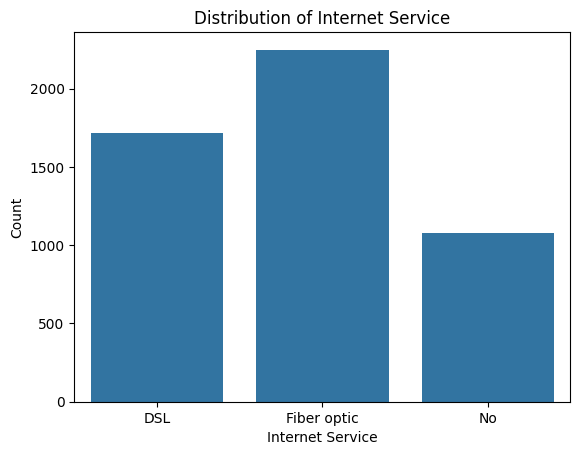

In [218]:
#The distribution of Internet Service
sns.countplot(x='InternetService', data=train)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')
plt.show()

From the graph, it appears that the majority of people in the dataset have Fiber optic as their internet service provider. This is indicated by the higher count or frequency of the "Fiber optic" category compared to other categories.
The second most common internet service provider is DSL (Digital Subscriber Line), which has a lower count compared to Fiber optic but still represents a significant portion of the dataset.

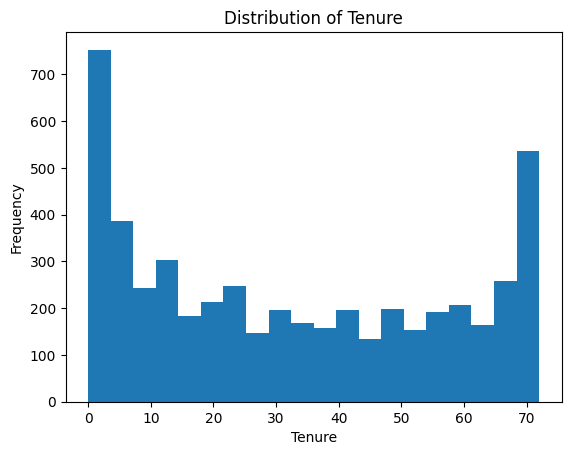

In [219]:
# Plot a histogram for 'tenure'
plt.hist(train['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

The histogram shows that there are relatively high frequencies of customers at the beginning and end of their tenure periods, with lower frequencies in the middle.
The middle curve, may indicate a potential period where customers are more likely to churn or transition to different services.

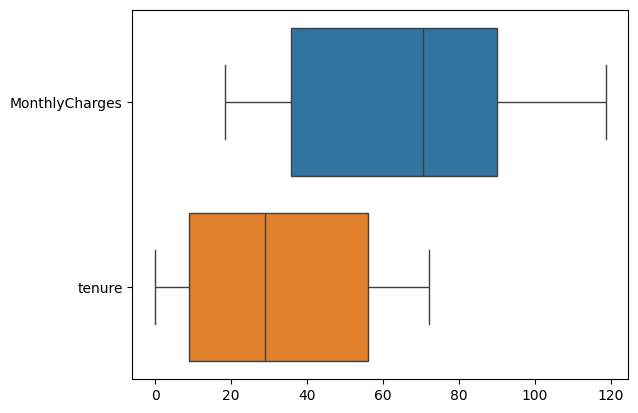

In [220]:
#checking outliers
sns.boxplot(data=clean_train[['MonthlyCharges', 'tenure']], orient='h')
plt.show()

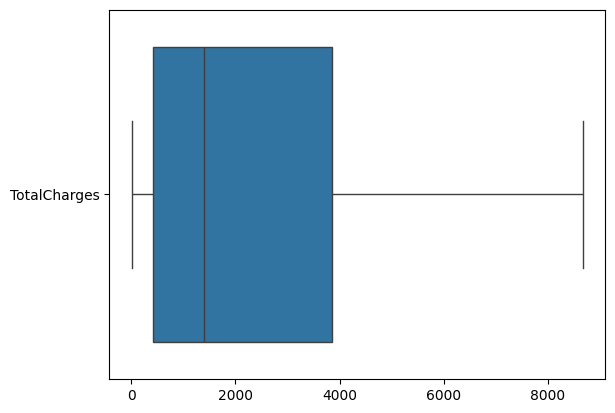

In [221]:
#checking outliers
sns.boxplot(data=clean_train[['TotalCharges']], orient='h')
plt.show()

There are no outliers based on the graph above

Distribution of Numerical values

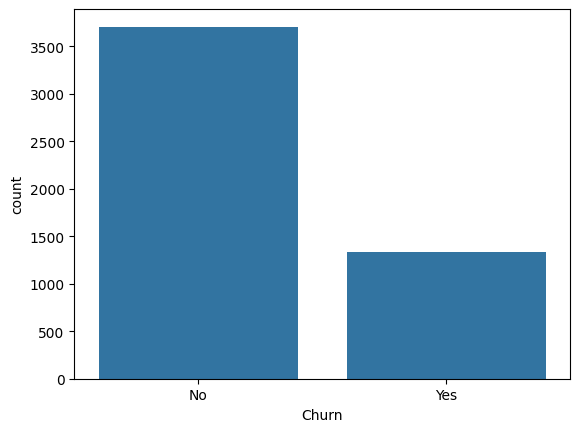

In [222]:
#The distribution in the Churn column
sns.countplot(x='Churn', data=clean_train)
plt.show()




In [223]:
# Count the number of churned customers
churned_customers = train[train['Churn'] == 'Yes'].shape[0]

# Count the total number of customers
total_customers = train.shape[0]

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Print the churn rate
print("Overall churn rate: {:.2f}%".format(churn_rate))

Overall churn rate: 26.49%


The overall churn rate in the dataset is 26.49%. This means that approximately 26.49% of the customers in the dataset have churned, while the remaining 73.51% have not churned.

### Bar chart showing Distribution of churn

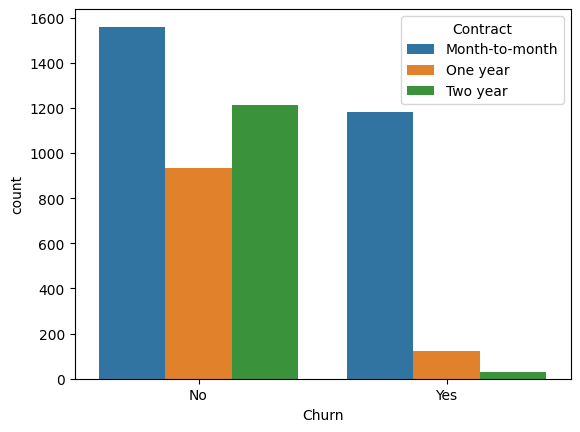

In [224]:
#Churn rate based on the type of contract
sns.countplot(x='Churn', data=train, hue='Contract')
plt.show()

Month-to-month churn is way higher than the other contract terms.

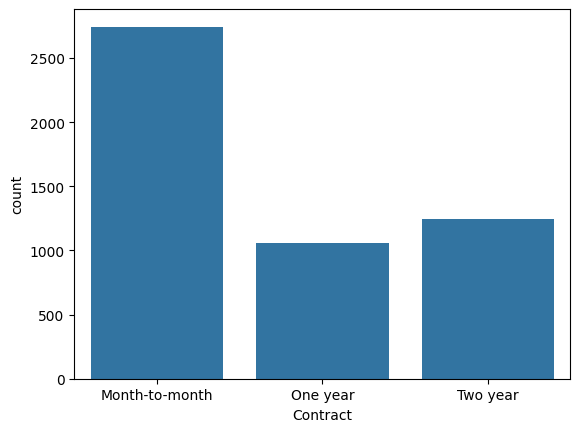

In [225]:
#Distribution of customers based on contract
sns.countplot(x='Contract', data=train,)
plt.show()

There are more month-to-month customers than long term customers

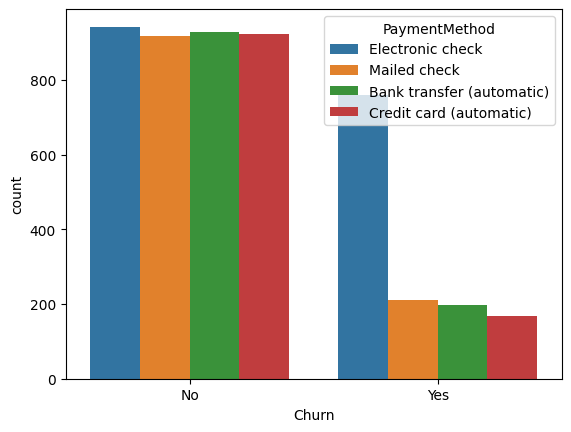

In [226]:
#Churn report based on the payment method used
sns.countplot(x='Churn', hue='PaymentMethod', data=train)
plt.show()

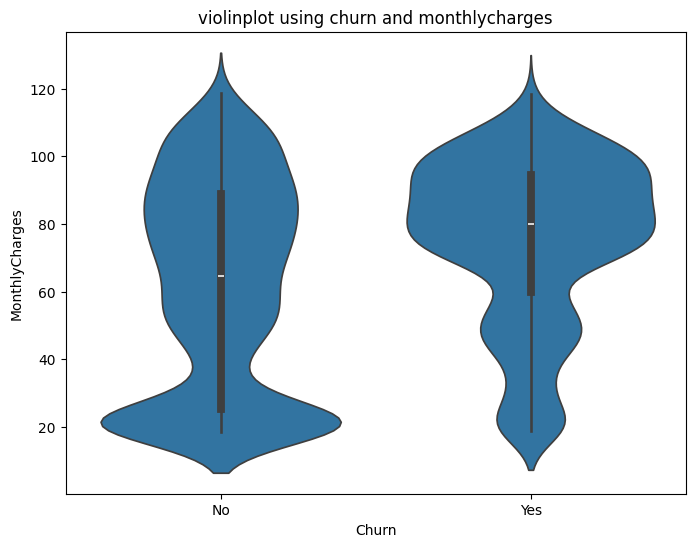

In [227]:
plt.figure(figsize=(8,6))
sns.violinplot(data=train,x='Churn',y='MonthlyCharges')
plt.title('violinplot using churn and monthlycharges',fontsize=12)
plt.show()

# Data preparation

In [228]:
#Check for balance of the data
df_balance = clean_train['Churn'].value_counts().rename('Total').reset_index()
df_balance


,Churn,Total
0,No,3707
1,Yes,1336


In [229]:
df_balance['Percentage'] = round((df_balance['Total'] / df_balance['Total'].sum()) * 100, 2)
df_balance

,Churn,Total,Percentage
0,No,3707,73.51
1,Yes,1336,26.49


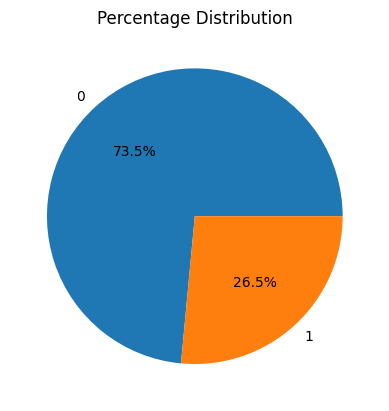

In [230]:
percentage_values = df_balance['Percentage']

# Create the pie chart
plt.pie(percentage_values, labels=df_balance.index, autopct='%1.1f%%')
plt.title('Percentage Distribution')  # Optional: Set the title

plt.show()

## Split Data into Training and Evaluation sets

In [231]:
X = clean_train.drop('Churn', axis=1)
y = clean_train['Churn']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [249]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [ ]:
#Machine learning packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Prepare Pipelines

In [263]:
cat_col = X.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [280]:
num_col = X.select_dtypes('number').columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5043.0,2298.488381,2269.455293,18.799999,415.724997,1398.599976,3857.575073,8670.100000


In [ ]:
skewness = num_col.skew()
#print("Skewness:", skewness)
skewness.T

SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.945807
dtype: float64

In [281]:
num_pipeline = Pipeline(steps=[
    ('num_scaler', StandardScaler()),
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_col),
    ('cat_pipeline', cat_pipeline, cat_col)
])

In [286]:
# Create a dictionary to store all pipelines
all_pipelines = {}

# Create final pipeline preprocessor and classifier
for model_name, classifier in models:
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor), 
        ('classifier', classifier)
    ])

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = final_pipeline

In [287]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Create a list of models
models = [
    ('Logistic_regression', LogisticRegression(random_state=40)),
    ('Decision_tree', DecisionTreeClassifier(random_state=40)),
    ('Random_forest', RandomForestClassifier(random_state=40)),
    ('Support_vector', SVC(random_state=40)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gradient_boost', GradientBoostingClassifier(random_state=40)),
    ('Naive_bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier(random_state=40))
]

In [293]:
all_pipelines

{'Logistic_regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('num_scaler',
                                                                    StandardScaler())]),
                                                   Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('cat_encoder',
                                                                    OneHotEncoder())]),
                                                   Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'I

In [290]:
# Specify the number of folds for cross-validation
k = 5

# Perform cross-validation for each model
for model_name, model in models:
    kf = KFold(n_splits=k, shuffle=True, random_state=40)
    scores = cross_val_score(model, X_train, y_train_encoded, cv=kf)
    average_accuracy = scores.mean()
    print(f"Model: {model_name}")
    print(f"Average Accuracy: {average_accuracy:.4f}")
    print("-----------------------------------")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1201, in fit
    X, y = self._validate_data(
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1201, in fit
    X, y = self._validate_data(
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Female'
